In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sstats
from glob import glob
import numpy as np

from utils import SimulateData

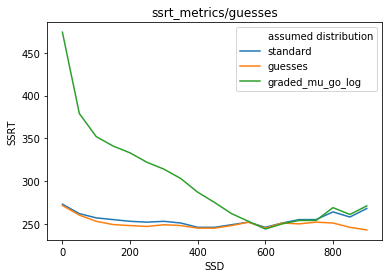

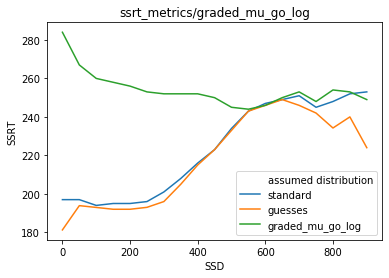

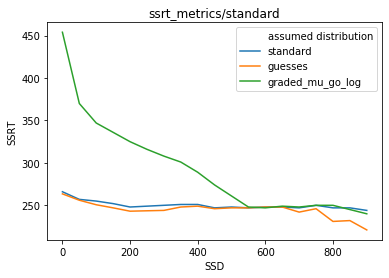

In [2]:
full_metric_df = pd.DataFrame()

full_melt = pd.DataFrame()

for file in glob('ssrt_metrics/*.csv'):
    title = file.split('indiv_')[-1].replace('.csv', '')
    data =  pd.read_csv(file, index_col=0)
    data.columns = data.columns.str.replace('SSRT_', '')
    data = data.rename(columns={'SSRT': 'standard', 'w_guesses': 'guesses', 'w_graded': 'graded_mu_go_log'})
    melt_df = pd.melt(data, id_vars=['SSD'], value_vars=['standard','guesses','graded_mu_go_log'], var_name = 'assumed distribution', value_name='SSRT')
    melt_df['underlying distribution'] = title
    full_melt = pd.concat([full_melt, melt_df], 0)
    
    
    _ = sns.lineplot(x='SSD', y='SSRT', hue='assumed distribution', data=melt_df)
    
    plt.title(title)
    plt.show()
    plt.close()
    
    # for inhibition function
    data['underlying distribution'] = title
    full_metric_df = pd.concat([full_metric_df, data], 0)
#     curr_series = data.loc[:,['mean_SSD', 'p_respond']].set_index('mean_SSD').add_prefix(title+'_')
#     p_respond_df = pd.concat([p_respond_df, curr_series], 1)

# organize ssrt metric data

In [3]:
full_metric_df = pd.DataFrame()

full_melt = pd.DataFrame()

for file in [i for i in glob('ssrt_metrics/*.csv') if 'linear' not in i]:
    title = file.split('/')[-1].replace('.csv', '')
    data =  pd.read_csv(file, index_col=0)
    data.columns = data.columns.str.replace('SSRT_', '')
    data = data.rename(columns={'SSRT': 'standard', 'w_guesses': 'guesses', 'w_graded': 'graded_mu_go_log'})
    melt_df = pd.melt(data, id_vars=['SSD'], value_vars=['standard', 'guesses', 'graded_mu_go_log'], var_name = 'assumed distribution', value_name='SSRT')
    melt_df['underlying distribution'] = title
    full_melt = pd.concat([full_melt, melt_df], 0)
    
    # for inhibition function
    data['underlying distribution'] = title
    full_metric_df = pd.concat([full_metric_df, data], 0)
#     curr_series = data.loc[:,['mean_SSD', 'p_respond']].set_index('mean_SSD').add_prefix(title+'_')
#     p_respond_df = pd.concat([p_respond_df, curr_series], 1)

# SSRT by SSD

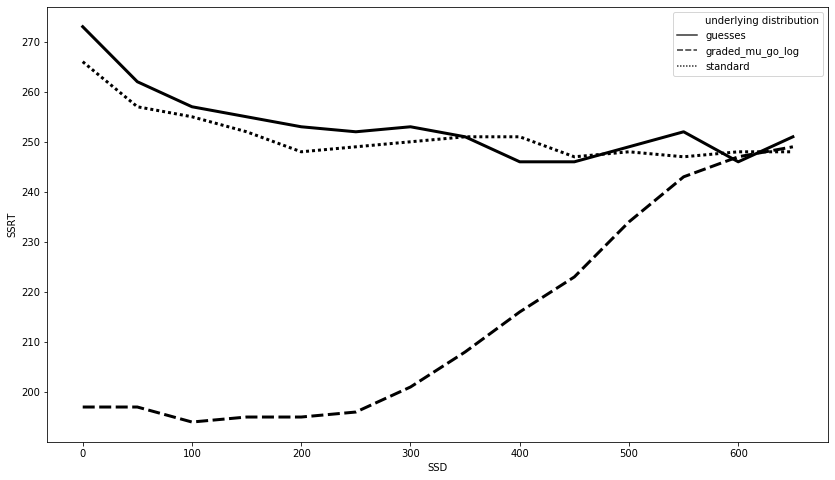

In [4]:
fig,ax = plt.subplots(1,1, figsize=(14, 8))
_ = sns.lineplot(x='SSD', y='SSRT', color='k', style='underlying distribution', data=full_melt[(full_melt['assumed distribution'] == 'standard') & (full_melt['SSD'] <= 650)], linewidth=3)
plt.savefig('figures/SSRT_by_SSD.png')

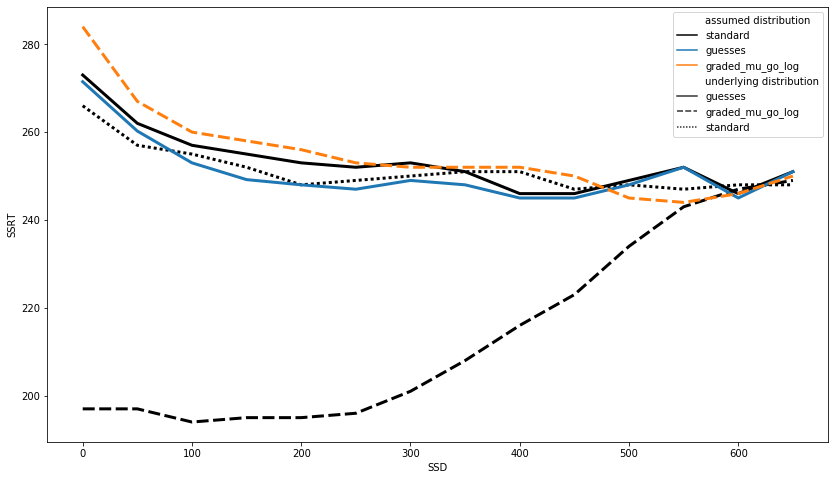

In [5]:
fig,ax = plt.subplots(1,1, figsize=(14, 8))
keep_idx = ((full_melt['assumed distribution'] == 'standard') | (full_melt['assumed distribution'] == full_melt['underlying distribution'])) & (full_melt['SSD'] <= 650)
_ = sns.lineplot(x='SSD', y='SSRT', hue='assumed distribution', style='underlying distribution', data=full_melt[keep_idx], palette=['k', '#1f77b4', '#ff7f0e'], linewidth=3)
plt.savefig('figures/SSRT_by_SSD_supplement.png')

In [6]:
full_metric_df[full_metric_df['underlying distribution'] == 'graded_mu_go_log']

,standard,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,SSD,guesses,graded_mu_go_log,underlying distribution
0,197.0,0.0,0.104040,2697.0,421.325147,272.192042,0,0.0,NaN,NaN,0.0,181.265767,284.0,graded_mu_go_log
1,197.0,50.0,0.227827,2697.0,421.325147,273.266840,0,0.0,NaN,NaN,50.0,193.880821,267.0,graded_mu_go_log
2,194.0,100.0,0.348653,2697.0,421.325147,283.984454,0,0.0,NaN,NaN,100.0,192.950424,260.0,graded_mu_go_log
3,195.0,150.0,0.466740,2697.0,421.325147,296.522618,0,0.0,NaN,NaN,150.0,192.000000,258.0,graded_mu_go_log
4,195.0,200.0,0.568220,2697.0,421.325147,309.424871,0,0.0,NaN,NaN,200.0,192.000000,256.0,graded_mu_go_log
5,196.0,250.0,0.653567,2697.0,421.325147,323.492008,0,0.0,NaN,NaN,250.0,193.000000,253.0,graded_mu_go_log
6,201.0,300.0,0.727367,2697.0,421.325147,335.163613,0,0.0,NaN,NaN,300.0,196.000000,252.0,graded_mu_go_log
7,208.0,350.0,0.786987,2697.0,421.325147,346.598587,0,0.0,NaN,NaN,350.0,205.000000,252.0,graded_mu_go_log
8,216.0,400.0,0.836107,2697.0,421.325147,356.616596,0,0.0,NaN,NaN,400.0,215.000000,252.0,graded_mu_go_log
9,223.0,450.0,0.873313,2697.0,421.325147,364.050719,0,0.0,NaN,NaN,450.0,223.000000,250.0,graded_mu_go_log


In [7]:
full_melt[full_melt['underlying distribution'] == 'graded_mu_go_log']

,SSD,assumed distribution,SSRT,underlying distribution
0,0.0,standard,197.000000,graded_mu_go_log
1,50.0,standard,197.000000,graded_mu_go_log
2,100.0,standard,194.000000,graded_mu_go_log
3,150.0,standard,195.000000,graded_mu_go_log
4,200.0,standard,195.000000,graded_mu_go_log
5,250.0,standard,196.000000,graded_mu_go_log
6,300.0,standard,201.000000,graded_mu_go_log
7,350.0,standard,208.000000,graded_mu_go_log
8,400.0,standard,216.000000,graded_mu_go_log
9,450.0,standard,223.000000,graded_mu_go_log


# Inhibition Function

In [8]:
abcd_inhib_func = pd.read_csv('abcd_data/abcd_inhib_func.csv')

In [9]:
inhib_func_df = pd.concat([full_metric_df[['SSD', 'p_respond', 'underlying distribution']], abcd_inhib_func], 0)

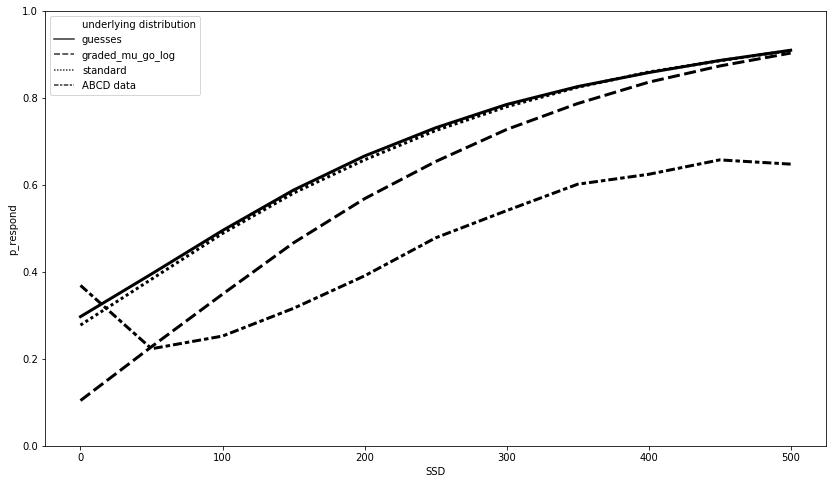

In [10]:
fig,ax = plt.subplots(1,1, figsize=(14, 8))
_ = sns.lineplot(x='SSD', y='p_respond', color='k', style='underlying distribution', data=inhib_func_df.query('SSD <= 500'), linewidth=3)
plt.ylim([0,1])
plt.savefig('figures/inhibition_function.png')

# Individual Differences

In [11]:
ABCD_SSD_dists = pd.read_csv('abcd_data/SSD_dist_by_subj.csv')
ABCD_SSD_dists

,NARGUID,SSDDur,proportion
0,003RTV85,300.0,0.250000
1,003RTV85,250.0,0.183333
2,003RTV85,400.0,0.183333
3,003RTV85,350.0,0.166667
4,003RTV85,450.0,0.100000
...,...,...,...
64043,xxmy9wd8,100.0,0.183333
64044,xxmy9wd8,150.0,0.133333
64045,xxmy9wd8,200.0,0.116667
64046,xxmy9wd8,250.0,0.100000


In [12]:
indiv_SSRTs = pd.DataFrame()
for file in [i for i in glob('ssrt_metrics/*.csv') if 'linear' not in i]:
    data =  pd.read_csv(file, index_col=0)
    
    gen_str = file.split('/')[-1].replace('.csv', '')
    indiv_ssrt_df = pd.DataFrame(np.nan, index=ABCD_SSD_dists.NARGUID.unique(), columns=['vanilla', 'w_guesses', 'w_graded'])
    for sub in ABCD_SSD_dists.NARGUID.unique():
        curr_sub = ABCD_SSD_dists.query("NARGUID=='%s'" % sub)
        indiv_ssrt_df.loc[sub, :] = [0, 0, 0]
        for SSD in curr_sub.SSDDur:
            ssd_SSRTs = data.loc[data.SSD==SSD, ['SSRT', 'SSRT_w_guesses', 'SSRT_w_graded']].values[0]
            weight = curr_sub.loc[curr_sub.SSDDur==SSD, 'proportion'].values
            indiv_ssrt_df.loc[sub, :] +=  ssd_SSRTs * weight
    indiv_SSRTs = pd.concat([indiv_SSRTs, indiv_ssrt_df.add_prefix('gen-%s_SSRT-' % gen_str)], 1)

In [13]:
indiv_SSRTs

,gen-guesses_SSRT-vanilla,gen-guesses_SSRT-w_guesses,gen-guesses_SSRT-w_graded,gen-graded_mu_go_log_SSRT-vanilla,gen-graded_mu_go_log_SSRT-w_guesses,gen-graded_mu_go_log_SSRT-w_graded,gen-standard_SSRT-vanilla,gen-standard_SSRT-w_guesses,gen-standard_SSRT-w_graded
003RTV85,250.783333,247.543452,308.350000,205.516667,202.713854,252.766667,250.033333,246.065216,304.883333
00CY2MDM,262.100000,259.033824,389.133333,195.800000,189.892536,267.766667,257.666667,254.572388,378.916667
00HEV6HB,259.416667,255.899164,371.266667,197.716667,190.555452,263.616667,255.100000,250.883761,361.016667
00LJVZK2,256.950000,253.788538,342.683333,207.266667,202.312778,260.100000,253.633333,250.110862,335.233333
00NPMHND,250.000000,248.357048,271.150000,231.300000,229.913854,249.316667,248.633333,246.921173,269.266667
...,...,...,...,...,...,...,...,...,...
hkfm1ruj,251.133333,248.663252,306.066667,211.150000,208.910672,253.216667,250.416667,247.615071,302.866667
hx1ru4hv,257.783333,253.684680,360.600000,195.700000,191.212109,261.750000,253.700000,249.591807,352.266667
jf8w3pw6,256.100000,251.776950,346.766667,195.933333,192.748894,259.066667,252.633333,248.308407,340.100000
x8k59,254.816667,250.465511,338.266667,196.850000,193.751742,257.366667,251.550000,247.080301,331.966667


In [14]:
indiv_SSRTs.to_csv('outputs/ABCD_weighted_SSRTs.csv')
indiv_SSRTs

,gen-guesses_SSRT-vanilla,gen-guesses_SSRT-w_guesses,gen-guesses_SSRT-w_graded,gen-graded_mu_go_log_SSRT-vanilla,gen-graded_mu_go_log_SSRT-w_guesses,gen-graded_mu_go_log_SSRT-w_graded,gen-standard_SSRT-vanilla,gen-standard_SSRT-w_guesses,gen-standard_SSRT-w_graded
003RTV85,250.783333,247.543452,308.350000,205.516667,202.713854,252.766667,250.033333,246.065216,304.883333
00CY2MDM,262.100000,259.033824,389.133333,195.800000,189.892536,267.766667,257.666667,254.572388,378.916667
00HEV6HB,259.416667,255.899164,371.266667,197.716667,190.555452,263.616667,255.100000,250.883761,361.016667
00LJVZK2,256.950000,253.788538,342.683333,207.266667,202.312778,260.100000,253.633333,250.110862,335.233333
00NPMHND,250.000000,248.357048,271.150000,231.300000,229.913854,249.316667,248.633333,246.921173,269.266667
...,...,...,...,...,...,...,...,...,...
hkfm1ruj,251.133333,248.663252,306.066667,211.150000,208.910672,253.216667,250.416667,247.615071,302.866667
hx1ru4hv,257.783333,253.684680,360.600000,195.700000,191.212109,261.750000,253.700000,249.591807,352.266667
jf8w3pw6,256.100000,251.776950,346.766667,195.933333,192.748894,259.066667,252.633333,248.308407,340.100000
x8k59,254.816667,250.465511,338.266667,196.850000,193.751742,257.366667,251.550000,247.080301,331.966667


In [15]:
indiv_SSRTs.corr().to_csv('outputs/ABCD_weighted_SSRTs_corr.csv')
indiv_SSRTs.corr()

,gen-guesses_SSRT-vanilla,gen-guesses_SSRT-w_guesses,gen-guesses_SSRT-w_graded,gen-graded_mu_go_log_SSRT-vanilla,gen-graded_mu_go_log_SSRT-w_guesses,gen-graded_mu_go_log_SSRT-w_graded,gen-standard_SSRT-vanilla,gen-standard_SSRT-w_guesses,gen-standard_SSRT-w_graded
gen-guesses_SSRT-vanilla,1.000000,0.960602,0.949654,-0.516979,-0.668233,0.972689,0.943991,0.812038,0.935825
gen-guesses_SSRT-w_guesses,0.960602,1.000000,0.940169,-0.458731,-0.593170,0.979158,0.989372,0.938676,0.935503
gen-guesses_SSRT-w_graded,0.949654,0.940169,1.000000,-0.724292,-0.829282,0.987031,0.956299,0.850700,0.998873
gen-graded_mu_go_log_SSRT-vanilla,-0.516979,-0.458731,-0.724292,1.000000,0.976741,-0.608511,-0.527601,-0.401709,-0.738950
gen-graded_mu_go_log_SSRT-w_guesses,-0.668233,-0.593170,-0.829282,0.976741,1.000000,-0.731465,-0.649783,-0.491879,-0.836087
gen-graded_mu_go_log_SSRT-w_graded,0.972689,0.979158,0.987031,-0.608511,-0.731465,1.000000,0.985072,0.896843,0.983487
gen-standard_SSRT-vanilla,0.943991,0.989372,0.956299,-0.527601,-0.649783,0.985072,1.000000,0.951450,0.955941
gen-standard_SSRT-w_guesses,0.812038,0.938676,0.850700,-0.401709,-0.491879,0.896843,0.951450,1.000000,0.860318
gen-standard_SSRT-w_graded,0.935825,0.935503,0.998873,-0.738950,-0.836087,0.983487,0.955941,0.860318,1.000000


In [16]:
indiv_SSRTs.corr(method='spearman').to_csv('outputs/ABCD_weighted_SSRTs_rank-corr.csv')
indiv_SSRTs.corr(method='spearman')

,gen-guesses_SSRT-vanilla,gen-guesses_SSRT-w_guesses,gen-guesses_SSRT-w_graded,gen-graded_mu_go_log_SSRT-vanilla,gen-graded_mu_go_log_SSRT-w_guesses,gen-graded_mu_go_log_SSRT-w_graded,gen-standard_SSRT-vanilla,gen-standard_SSRT-w_guesses,gen-standard_SSRT-w_graded
gen-guesses_SSRT-vanilla,1.000000,0.936587,0.947001,-0.807579,-0.903627,0.954046,0.881677,0.591671,0.941313
gen-guesses_SSRT-w_guesses,0.936587,1.000000,0.934795,-0.769941,-0.869575,0.946590,0.917736,0.713664,0.933915
gen-guesses_SSRT-w_graded,0.947001,0.934795,1.000000,-0.886412,-0.971321,0.994566,0.931084,0.633493,0.999610
gen-graded_mu_go_log_SSRT-vanilla,-0.807579,-0.769941,-0.886412,1.000000,0.935687,-0.862194,-0.759041,-0.404936,-0.887220
gen-graded_mu_go_log_SSRT-w_guesses,-0.903627,-0.869575,-0.971321,0.935687,1.000000,-0.950442,-0.861628,-0.535742,-0.971026
gen-graded_mu_go_log_SSRT-w_graded,0.954046,0.946590,0.994566,-0.862194,-0.950442,1.000000,0.947602,0.658765,0.994002
gen-standard_SSRT-vanilla,0.881677,0.917736,0.931084,-0.759041,-0.861628,0.947602,1.000000,0.776620,0.934241
gen-standard_SSRT-w_guesses,0.591671,0.713664,0.633493,-0.404936,-0.535742,0.658765,0.776620,1.000000,0.641123
gen-standard_SSRT-w_graded,0.941313,0.933915,0.999610,-0.887220,-0.971026,0.994002,0.934241,0.641123,1.000000


In [17]:
indiv_SSRTs.filter(regex='SSRT-vanilla').corr(method='spearman')

,gen-guesses_SSRT-vanilla,gen-graded_mu_go_log_SSRT-vanilla,gen-standard_SSRT-vanilla
gen-guesses_SSRT-vanilla,1.000000,-0.807579,0.881677
gen-graded_mu_go_log_SSRT-vanilla,-0.807579,1.000000,-0.759041
gen-standard_SSRT-vanilla,0.881677,-0.759041,1.000000


# Plot graded Mu Go function

In [18]:
SSDs = np.arange(0,650, 5)

simulator = SimulateData()
mu_gos = [[i, simulator._log_mu_go(1, i)] for i in SSDs]

/Users/henrymj/Documents/ABCD_simulations/utils.py:268: RuntimeWarning: divide by zero encountered in log
  return self._at_least_0((np.log(SSD/max_SSD)/4+1) * mu_go)


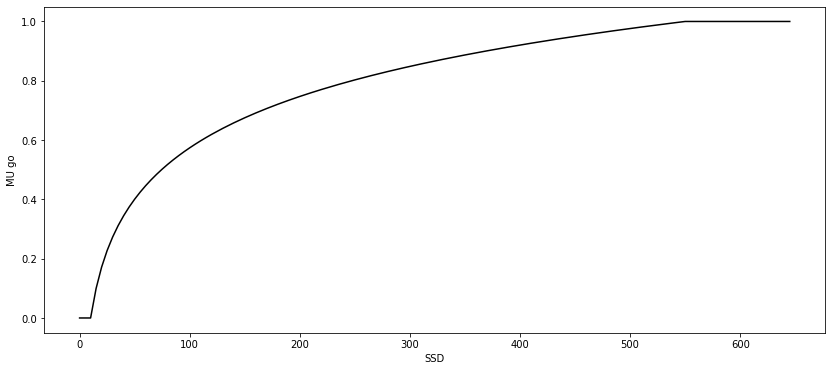

In [19]:
fig,ax = plt.subplots(1,1, figsize=(14, 6))

_ = sns.lineplot(x='SSD', y='MU go', color='k', data=pd.DataFrame(mu_gos, columns=['SSD', 'MU go']))
plt.savefig('figures/graded_mu_go_function.png')